#IMPORTING Libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import  warnings 
warnings.filterwarnings("ignore")

#Importing data and taking a glance 

In [2]:
df=pd.read_excel("/content/medical_insurance_charges (2) (1) (2).xlsx") # reading the dataset 

In [3]:
df

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001.0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,10002.0,18.0,male,33.8,1.0,no,southeast,1725.55
2,10003.0,28.0,male,33.0,3.0,no,southeast,4449.46
3,10004.0,33.0,male,22.7,0.0,no,northwest,21984.47
4,10005.0,32.0,male,28.9,0.0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,11334.0,50.0,male,31.0,3.0,no,northwest,10600.55
1334,11335.0,18.0,female,31.9,0.0,no,northeast,2205.98
1335,11336.0,18.0,female,36.9,0.0,no,southeast,1629.83
1336,11337.0,21.0,female,25.8,0.0,no,southwest,2007.95


In [4]:
df["sex"].apply(len)

0       6
1       4
2       4
3       4
4       4
       ..
1333    4
1334    6
1335    6
1336    6
1337    6
Name: sex, Length: 1338, dtype: int64

In [5]:
df

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001.0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,10002.0,18.0,male,33.8,1.0,no,southeast,1725.55
2,10003.0,28.0,male,33.0,3.0,no,southeast,4449.46
3,10004.0,33.0,male,22.7,0.0,no,northwest,21984.47
4,10005.0,32.0,male,28.9,0.0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,11334.0,50.0,male,31.0,3.0,no,northwest,10600.55
1334,11335.0,18.0,female,31.9,0.0,no,northeast,2205.98
1335,11336.0,18.0,female,36.9,0.0,no,southeast,1629.83
1336,11337.0,21.0,female,25.8,0.0,no,southwest,2007.95


In [6]:
df.head() # showing the first five rows from the data 

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001.0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,10002.0,18.0,male,33.8,1.0,no,southeast,1725.55
2,10003.0,28.0,male,33.0,3.0,no,southeast,4449.46
3,10004.0,33.0,male,22.7,0.0,no,northwest,21984.47
4,10005.0,32.0,male,28.9,0.0,no,northwest,3866.86


In [7]:
df.info() # as we can see our data have 1338 record , 7 features and our targert (charges) 
# Aslo we can see there is no null values in our data until now 
# But our data type need to be converted 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientid  1338 non-null   float64
 1   age        1338 non-null   float64
 2   sex        1338 non-null   object 
 3   bmi        1338 non-null   float64
 4   children   1338 non-null   float64
 5   smoker     1338 non-null   object 
 6   region     1338 non-null   object 
 7   charges    1338 non-null   float64
dtypes: float64(5), object(3)
memory usage: 83.8+ KB


PROBLEM STATEMENT :
predict how much charge a person will have to  pay  to the medical insurance based on some features such as their age ,bmi , number of children ,smoker status ,etc )

So our problem is Regression because our target variable (charges) is numeric(continous) 



Steps : 1 )Cleaning the data 
        2) EDA (Expolatory data analysis) 
        3) Feature Selection 
        4) Modeling 

# Cleaning the Data 

1- checking the categorical columns 

In [8]:
df["sex"].value_counts() # we can see that  we have only male and female so there is nothing wrong 
#Also we can conclude that we have nearly the same number of male and female 

male      676
female    662
Name: sex, dtype: int64

In [9]:
df["smoker"].value_counts(normalize=True) # we can see that  we have only smoker and nonsmoker so there is nothing wrong 
# Also we can conclude that  a high percentage is non smoker in our data  

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [10]:
df["region"].unique() # we have four regions which is right 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df["region"].value_counts(normalize=True) # we have people from all the region in nearly equally percantage 

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

2- data types 

now after checking on the inconcsistancy in the categorical variable we need to change the data types 

In [12]:
df[["age" ,'children']]=df[["age" ,'children']].astype('int') # changing data type into int 

In [13]:
df[["sex",'region','smoker']]=df[["sex",'region','smoker']].astype("category") # changing data type into category 

In [14]:
df.dtypes # our data has the correct types 
#NOTE : patientid we will remove it later because it doesn't have any affect on our model 

patientid     float64
age             int64
sex          category
bmi           float64
children        int64
smoker       category
region       category
charges       float64
dtype: object

3=checking missing values 

In [15]:
df.isnull().sum() # we can see there is no missing values in our data as i have mentioned before 

patientid    0
age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

4- checking duplicated observation 

In [16]:
dup=df.duplicated(subset=["patientid"] ,keep=False)#...creating False /True series to see duplicated values  


In [17]:
dup.sum()# as we can see there is no duplicated values 

0

# EXPLATORY DATA ANALYSIS (EDA)

In [18]:
df.describe() 

,patientid,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10669.500000,39.207025,30.665471,1.094918,13270.422414
std,386.391641,14.049960,6.098382,1.205493,12110.011240
min,10001.000000,18.000000,16.000000,0.000000,1121.870000
25%,10335.250000,27.000000,26.300000,0.000000,4740.287500
50%,10669.500000,39.000000,30.400000,1.000000,9382.030000
75%,11003.750000,51.000000,34.700000,2.000000,16639.915000
max,11338.000000,64.000000,53.100000,5.000000,63770.430000


In [19]:
df=df.drop("patientid" ,axis=1) # dropping the id columns 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16c503670>,
      dtype=object)

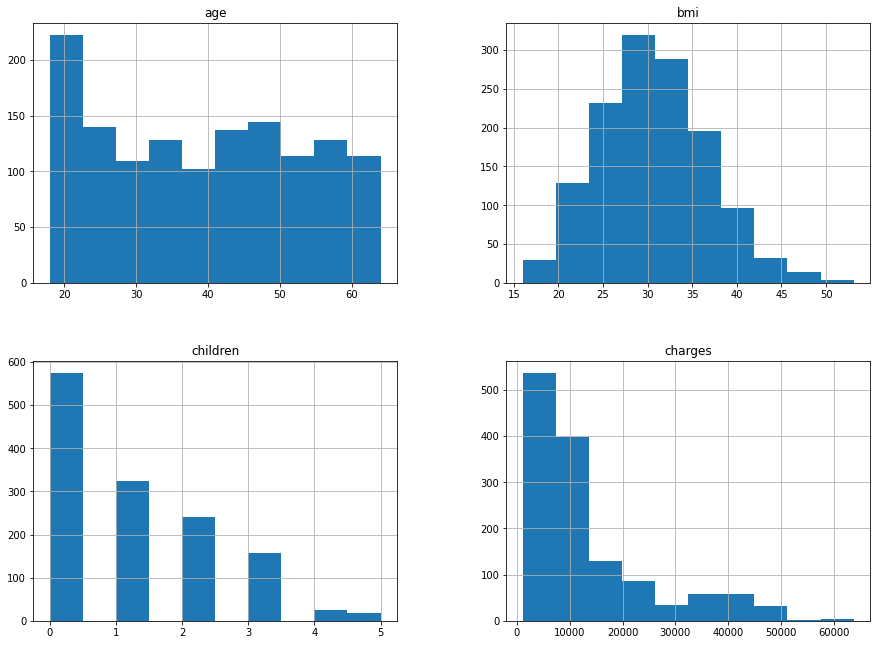

In [20]:
df.hist(figsize=(15,11))

# from the hist we can get an overall insights :  
1- regarding bmi column , it seems to be normal distribution. in other word , most of people's bmi  is distributed around 30 .
2- charges ,our target variable , is right skew .
so we can see that most of people has paied small charges . 
3- most of people has no children . 
and only few has 4 or 5 children 
4- age is nearly has a uniform dist 

In [21]:
df_num=df.select_dtypes(include=["int" ,"float"])
def outliers (col_name) : 
  """ filtering the outliers using inter quantile range methid """
  Q1=np.quantile(df_num[col_name],0.25)
  Q3=np.quantile(df_num[col_name],0.75)
  IQR=Q3-Q1
  upper_limit=Q3+1.5*IQR
  lower_limit=Q1-1.5*IQR
  return (df_num[col_name] > upper_limit) | (df_num[col_name]<lower_limit)


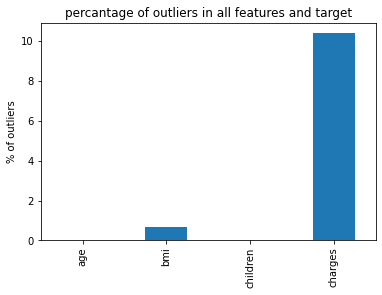

In [22]:
x={}
for col in df_num.columns : 
  x[col]=outliers(col).mean()*100
  pd.Series(x).plot(kind="bar" , ylabel="% of outliers" ,title="percantage of outliers in all features and target")

In [23]:
df=df[df["charges"]<50000]
df # deleting the 8 rows 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Finding relation between target and our feature visually

a_cat plot 

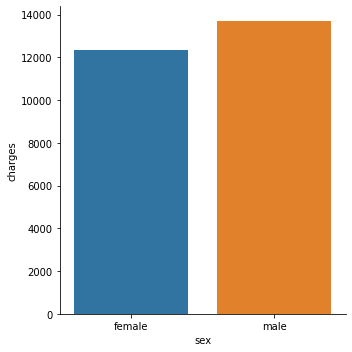

In [24]:
sns.catplot(x="sex",y="charges",data=df,kind="bar",ci=None) #we can see that male have more charges than female but not this big diff 

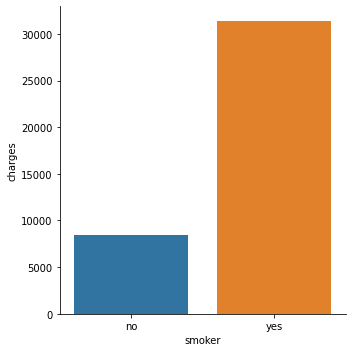

In [25]:
sns.catplot(x="smoker",y="charges",data=df,kind="bar",ci=None) # here we can see there is a strong realtion between smoker and caharges column
# we can conclude that smoker people pay more charges than non smoker people becaus thay are more likely to get a disease 

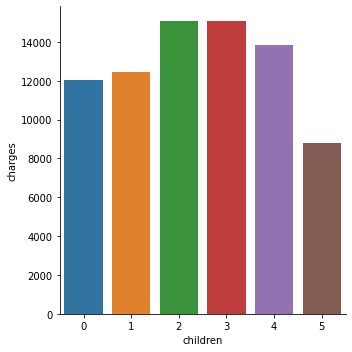

In [26]:
sns.catplot(x="children",y="charges",data=df,kind="bar",ci=None) # we can see there is a non linear realtionship between charges and children 
# Also , we can see that family whose has three / two children pays the most . 

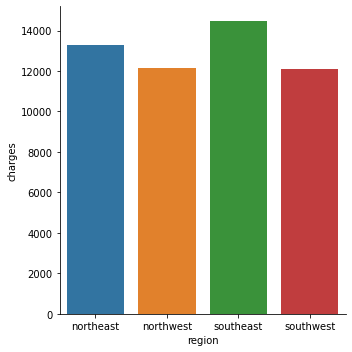

In [27]:
sns.catplot(x="region",y="charges",data=df,kind="bar",ci=None) # we can see there is a slightly diff in charges depending on the region 

numerical plot 

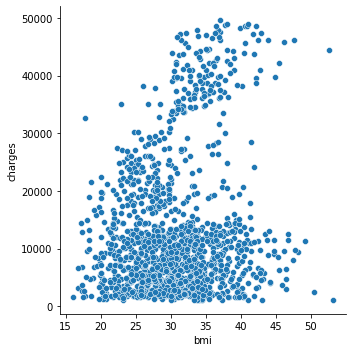

In [28]:
sns.relplot(x="bmi",y="charges",data=df,kind="scatter",ci=None)

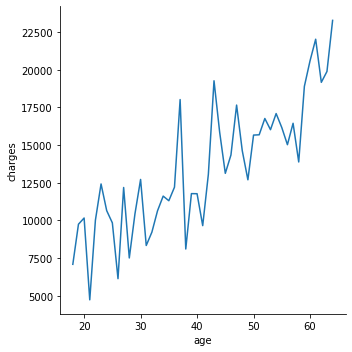

In [29]:
sns.relplot(x="age",y="charges",data=df,kind="line",ci=None) # we can see there is a slightly diff in charges depending on the region 
# we can see there is a fluctating in cahrges  but overall we see that as the age increase the cahrges will increase because is more tend
#to get sick . 

# Feature Selection  

feature selection using backword elimination method 

NOTE before we perform backword elimination we need to encoing the categorical columns 

1-Encoding 

a) label encoding 

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [31]:
df["sex"]=df["sex"].replace("female" ,0 )
df["sex"]=df["sex"].replace("male" ,1 )

In [32]:
df["smoker"]=df["smoker"].replace("no" ,0 )
df["smoker"]=df["smoker"].replace("yes" ,1 )

# one hot encoding 

In [33]:
df_city=pd.get_dummies(df["region"])
df_dummies=pd.concat([df,df_city] ,axis=1)
df_dummies=df_dummies.drop("region",1)

In [34]:
df_dummies

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1


3- backword elimination 

In [35]:
x=df_dummies.drop("charges" ,axis=1).values# select all features
y=df_dummies["charges"].values # select the target 
x.shape

(1331, 9)

In [36]:
x=np.append(arr=np.ones((1331,1)).astype("int"),values=x,axis=1) # adding one to the first column of the array 
x.shape

(1331, 10)

In [37]:
#significance level is 0.05 
#backword elimination for feature selection 
import  statsmodels.api as sm 
x_opt=x[: , [0,1,2,3,4,5,6,7,8,9]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     503.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:59:06   Log-Likelihood:                -13426.
No. Observations:                1331   AIC:                         2.687e+04
Df Residuals:                    1322   BIC:                         2.692e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9516.6973    754.838    -12.608      0.0

In [38]:
# here we have  index 2 has p_value higher than 0.05 sow well delete it 
x_opt=x[: , [0,1,3,4,5,6,7,8,9]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     575.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:59:06   Log-Likelihood:                -13426.
No. Observations:                1331   AIC:                         2.687e+04
Df Residuals:                    1323   BIC:                         2.691e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9549.9828    748.148    -12.765      0.0

In [39]:
# as we can see all the columns has p_values lower than 0.05 so they associates with our target 

In [40]:
df_extract=df_dummies.drop("charges" ,axis=1) # dropping the column of target to only take features 
df_extract=df_extract.iloc[:, [0,2,3,4,5,6,7,8]]

In [41]:
y=df_dummies["charges"]# our target Series 
df_new=pd.concat([df_extract ,y] ,axis=1) # features dataFrame that resulted from the backword elimination

In [42]:
df_new # we can see that onlys sex column has been deleted 

,age,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,27.9,0,1,0,0,0,1,16884.92
1,18,33.8,1,0,0,0,1,0,1725.55
2,28,33.0,3,0,0,0,1,0,4449.46
3,33,22.7,0,0,0,1,0,0,21984.47
4,32,28.9,0,0,0,1,0,0,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,0,1,0,0,10600.55
1334,18,31.9,0,0,1,0,0,0,2205.98
1335,18,36.9,0,0,0,0,1,0,1629.83
1336,21,25.8,0,0,0,0,0,1,2007.95


In [43]:
df_new

,age,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,27.9,0,1,0,0,0,1,16884.92
1,18,33.8,1,0,0,0,1,0,1725.55
2,28,33.0,3,0,0,0,1,0,4449.46
3,33,22.7,0,0,0,1,0,0,21984.47
4,32,28.9,0,0,0,1,0,0,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,0,1,0,0,10600.55
1334,18,31.9,0,0,1,0,0,0,2205.98
1335,18,36.9,0,0,0,0,1,0,1629.83
1336,21,25.8,0,0,0,0,0,1,2007.95


# models 

In [44]:
# importing required libraries 
from sklearn.model_selection import train_test_split ,cross_val_score , KFold,GridSearchCV ,RandomizedSearchCV ,learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [45]:
class Regresssion_models() : # creating a class for random forest and gradient boosting algorithms, which contains functions that help automating any data to choose the best model
  def __init__(self,data,target,algorithim): 
    """ variables related to the entire class """
    self.data=data
    self.target=target
    self.algorithim=algorithim
  
  
  def model(self) :
    """ splitting data, features from target variables. And splitting data to train and test to get reliable results """
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state=0)
    return(X_train ,X_test ,y_train ,y_test)

  def train(self):
    """ trainig the model to get the coefficients"""
    mdl=self.algorithim
    return mdl.fit(self.model()[0],self.model()[2])

  def accuracy(self,number_of_fold=5):
    """ Calculate the accuracy for cross validation of data, training, and testing the data"""
    train_score=self.train().score(self.model()[0],self.model()[2])
    test_score=self.train().score(self.model()[1],self.model()[3])
    return (f"train_score:{train_score} ,test_score :{test_score}")

  def enhance_rf_model(self,n_estimators=100 ,max_depth=8 , min_sample_leaf=3,number_of_fold=5) : 
    """ Hyperparameter tuning for the random forest model, to get best hyperparameter"""
    grid={"n_estimators":n_estimators, "max_depth":max_depth, "min_samples_leaf" : min_sample_leaf}
    CV=RandomizedSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1,n_iter=25) 
    CV.fit(self.model()[0],self.model()[2])
    return CV.best_params_

  def charges_var(self) : 
    """Finding the residual which between the actual and perdition charges to see how its distribution looks links."""
    y_pred = self.train().predict(self.model()[1])
    y_test=self.model()[3]
    residual=y_test-y_pred
    plt.figure(figsize=(10,8))
    return sns.distplot(residual) 

In [46]:
Rf=Regresssion_models(df_new,"charges",RandomForestRegressor()) # instatiate our class 

In [47]:
Rf.accuracy() # as we can see here there is overfitting so we need to tune some hyper parameter to avoid it 

'train_score:0.9741919147916099 ,test_score :0.8780050625042382'

In [48]:
dict_=Rf.enhance_rf_model(n_estimators=np.arange(100,300,50),max_depth=np.arange(4,10,1),min_sample_leaf=np.arange(5,15,1))#tuning hyperparameter

In [49]:
dict_

{'n_estimators': 250, 'min_samples_leaf': 9, 'max_depth': 4}

In [50]:
Rf=Regresssion_models(data=df_new,target="charges",algorithim=RandomForestRegressor(**dict_)) #instantiate the class with new hyperparameter

In [51]:
Rf.accuracy() # now we can see that the over fitting probelm has been solved 

'train_score:0.8720023946692456 ,test_score :0.8628312825311991'

Gradiant boosting without class structure

In [52]:
X=df_new.drop("charges",axis=1)   # selecting features only 
y=df_new["charges"] #selecting target 

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0) # splitting the data into train and test 

In [54]:
Gb=GradientBoostingRegressor(learning_rate=0.1) # instantiate our model 
Gb.fit(X_train,y_train) # fit the model 

GradientBoostingRegressor()

In [55]:
test_accuracy=Gb.score(X_test,y_test) 
train_accuracy=Gb.score(X_train,y_train)
print(f"test_accuracy : {test_accuracy} ,train_accuracy : {train_accuracy}")

test_accuracy : 0.867999003656442 ,train_accuracy : 0.8945844851665181


enhancing gradiant boosting 

In [56]:
grid={"n_estimators":np.arange(50,150,30)} 
CV=GridSearchCV(Gb,grid,cv=5) # hyper parameter tuning using GridSearchCv 
CV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': array([ 50,  80, 110, 140])})

In [57]:
CV.best_params_

{'n_estimators': 50}

In [58]:
Gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50, max_depth=4,min_samples_leaf=11,random_state=0)


In [59]:
Gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11, n_estimators=50,
                          random_state=0)

In [60]:
test_accuracy=Gb.score(X_test,y_test)
train_accuracy=Gb.score(X_train,y_train)
print(f"test_accuracy : {test_accuracy} ,train_accuracy : {train_accuracy}")

test_accuracy : 0.8710287228693586 ,train_accuracy : 0.8865570923353422


# BEST MODEL 

In [61]:
Gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50, max_depth=4,min_samples_leaf=11)
Gb.fit(X_train,y_train)
test_accuracy=Gb.score(X_test,y_test)
train_accuracy=Gb.score(X_train,y_train)
print(f"test_accuracy : {test_accuracy} ,train_accuracy : {train_accuracy}")

test_accuracy : 0.8710287228693586 ,train_accuracy : 0.8865570923353422


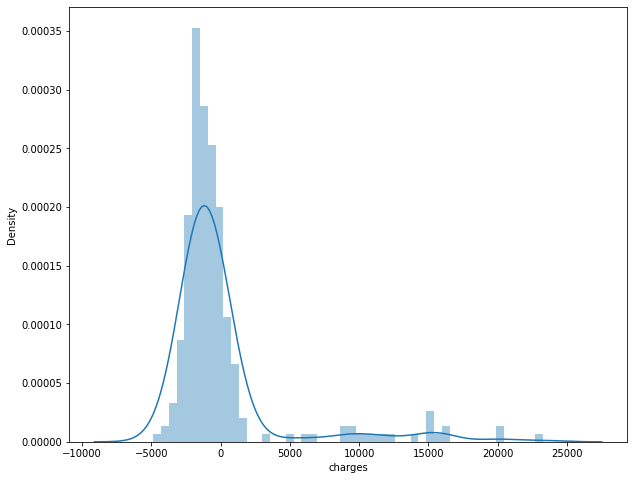

In [62]:
y_pred = Gb.predict(X_test)
residual=y_test-y_pred
plt.figure(figsize=(10,8))
sns.distplot(residual) 

# this graph shows our model works well bec all the values nearly centered around 0 
# also we can see that we have +/- 4000 confiance intervals 